<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B0_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D0%B5_Pandas_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Работа с таблицами данных на примере Pandas. Часть 1


Pandas, часть 1.
*   pd.Series
*   pd.DataFrame
*   Знакомство с основными методами Pandas на примере обработки датасета Titanic
*   Чтение DataFrame из различны форматов файлов, сохранение DataFrame
*   Первое знакомство с данными
*   Работа с пропусками
*   Получение подвыборок из DataFrame
    *   Извлечение нескольких колонок
    *   Извлечение строк по маске
    *   Извлечение (обращение) к конкретным значениям таблицы
*   Добавление данных:
    *   Добавление новых колонок
    *   Добавление новых строк




## Введение

Pandas  - одна из самых популярных библиотек для анализа данных.

В библиотеке Pandas есть два основных вида информационных контейнеров:

*   Series
*   DataFrame

**Series** - это структура, которая содержит одномерный массив данных и индексы.

**DataFrame** - это двумерная структура данных (таблица), которая содержит данные и их индексы.



## pd.Series

In [ ]:
# для начала работы подключим библиотеку
import pandas as pd

In [ ]:
# создадим объект Series из списка чисел
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 4, 3, 2, 1, 1, 1])
print(s) # вывеем его на печать

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     6
8     5
9     4
10    4
11    3
12    2
13    1
14    1
15    1
dtype: int64


In [ ]:
# посмотрим что из себя представляет index
s.index

RangeIndex(start=0, stop=16, step=1)

In [ ]:
# посмотрим какие значения хранятся в Series
s.values

array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 4, 3, 2, 1, 1, 1])

In [ ]:
# выведем сколько встречается каждое уникальное значение
s.value_counts()

1    4
4    3
6    2
5    2
3    2
2    2
7    1
dtype: int64

In [ ]:
# создадим еще один объект Series 
sales = pd.Series([1320, 1680, 1570, 1726], index=['2017 Sales', '2018 Sales', '2019 Sales', '2020 Sales'], name='Sales product B')
print(sales) # выведем его на печать

2017 Sales    1320
2018 Sales    1680
2019 Sales    1570
2020 Sales    1726
Name: Sales product B, dtype: int64


In [ ]:
# посмотрим на значения
sales.values

array([1320, 1680, 1570, 1726])

In [ ]:
# посмотрим на индексы
sales.index

Index(['2017 Sales', '2018 Sales', '2019 Sales', '2020 Sales'], dtype='object')

In [ ]:
# посмотрим на тип данных
type(s)

pandas.core.series.Series

## pd.DataFrame

In [ ]:
# создание DataFrame, вариант 1

index = ['Иванов', 'Петров', 'Сидоров'] # создадим список, будем использовать его для индексов
columns = ['математика', 'физика', 'литература'] # создадим список, будем использовать его как названия колонок

# создадим список с данными
data = [[5, 5, 4], 
        [2, 4, 5],
        [3, 2, 4]]

# создадим DataFrame 
tabel = pd.DataFrame(data=data, index=index, columns=columns)
tabel # выведем его

,математика,физика,литература
Иванов,5,5,4
Петров,2,4,5
Сидоров,3,2,4


In [ ]:
# еще один способ создать DataFrame, через словарь
tabel_a = pd.DataFrame({'математика' : [5, 2, 3], 
                        'физика' : [5, 4, 2], 
                        'литература' : [4, 5, 4]}, index = index)
tabel_a # выведем DataFrame

,математика,физика,литература
Иванов,5,5,4
Петров,2,4,5
Сидоров,3,2,4


In [ ]:
type(tabel) # посмотрим тип данных

pandas.core.frame.DataFrame

In [ ]:
# посмотрим на колонку с данными, похоже на Series
tabel['математика']

Иванов     5
Петров     2
Сидоров    3
Name: математика, dtype: int64

In [ ]:
# убедимся что это Series, вызвав функцию type
type(tabel['математика'])

pandas.core.series.Series

In [ ]:
# а еще к колонке можно обращаться по имени через точку

tabel.математика

Иванов     5
Петров     2
Сидоров    3
Name: математика, dtype: int64

## Еще раз повторяем и соединяем все вместе

DataFrame - двумерная структура данных. Строки можно разссматривать как разные экземпляры (объекты), в каждой колонке содержится определенный признак.
* Columns - названия столбцов
* index - индексы рядов (строк)

Структура данных (data)
* Row - ряды
* Column - колонки

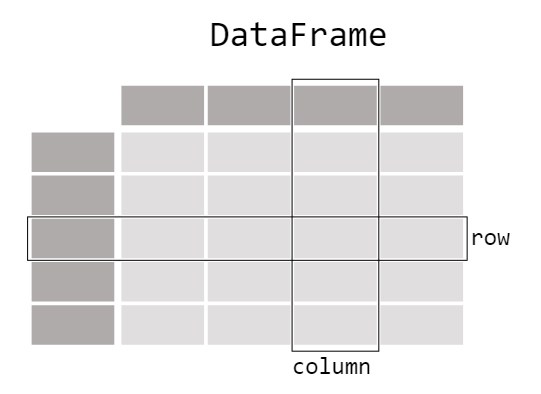

Series - это одномерная структура данных, похожая на np.array + индексы.
Каждая колонка DataFame является Series

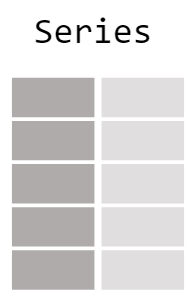

## Экспресс-знакомство с основными методами работы с данными на примере датасета Titanic

! Мы используем загрузку датасетов из своего источника. Рекомендуем вам загружать из него. Однако, если у вас есть свой датасет, можете использовать ячейки ниже, подключить Google Drive, скопировать на него датасет, и не забудьте при загрузке указать свой адрес к файлу датасета, см. занятие по основам Python.

In [ ]:
!wget http://dataudt.ru/datasets/titanic.csv

--2021-04-15 09:10:55--  http://dataudt.ru/datasets/titanic.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29474 (29K) [application/octet-stream]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  28.78K  --.-KB/s    in 0.1s    

2021-04-15 09:10:56 (203 KB/s) - ‘titanic.csv.1’ saved [29474/29474]



In [ ]:
!ls

sample_data  titanic.csv  titanic.csv.1


In [ ]:
# загрузим датасет Титаник из csv в DataFrame

titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df.head(10) # выведем первые 10 строк

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Вот эти 2 ячейки ниже можно использовать чтобы загрузить данные. Не забудьте изменить путь к файлу. Если не хотите менять путь, нужно предварительно на Google Drive создать папку datasets, и уже в неё скопировать файлы датасетов.


In [ ]:
# подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
# файлы предварительно уже записали на Google Drive
# после запуска переходим по ссылке, которая появится, для идентификации
# копируем оттуда код authorization code и вставляем здесь в окошко
# Вам нужно создать собственные папки, указать собственный путь, какой у Вас к файлам

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# загрузим датасет Титаник из csv в DataFrame

#titanic_df = pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')
#titanic_df.head(10) # выведем первые 10 строк

In [ ]:
titanic_df.tail() # выведем последние 5 строк

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
titanic_df.shape # посмотрим на форму загруженного DataFrame

(418, 12)

In [ ]:
titanic_df.info() # выведем инфомрацию методом info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic_df['Sex'] # Посмотрим на колонку "Пол"

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

In [ ]:
titanic_df['Sex'].value_counts() # методом value_counts выведем количество мужчин и женщин

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
titanic_df['Age'].value_counts() # методом value_counts выведем сколько раз встречаются разные значения возраста в наших данных 

24.0    17
21.0    17
22.0    16
30.0    15
18.0    13
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [ ]:
age_mask = titanic_df['Age'].isna() # создадим маску, соответствующую пропущенным значениям в колонке Возраст (Age)
age_mask # выведем маску - это Series содержащий данные формата boolean

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool

In [ ]:
titanic_df[age_mask] # применим маску к датасету и посмотрим на записи в которых возраст неизвестен

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# предположим, что отсутствие информации о возрасте и номере каюты может оказаться полезным признаком
# поэтому прежде чем обрабатывтаь пропуски сохраним информацию о том, что пропуски в данных были
# в новых колонках Age_is_Unknown  и Cabin_is_Unknown

titanic_df['Age_is_Unknown'] = titanic_df['Age'].isna().astype(int) # к колоке Age последовательно применяем isna,  а затем переводим логические True/False в целочисленные 1 и 0
titanic_df['Cabin_is_Unknown'] = titanic_df['Cabin'].isna().astype(int) # к колоке Cabin последовательно применяем isna,  а затем переводим логические True/False в целочисленные 1 и 0
titanic_df.head() # выведем 5 первых строк

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_Unknown,Cabin_is_Unknown
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [ ]:
median_age = titanic_df['Age'].median() # находим медианну всех возрастов
repl = {'Age' : median_age} # создадим словарь
titanic_df.fillna(repl, inplace=True) # заполним все пропущенные значения в колонке возраст медианным значением

In [ ]:
titanic_df.drop(columns=['PassengerId', 'Cabin'], inplace=True) # удалим колонки PassengerId и Cabin

In [ ]:
titanic_df.info() # выведем информацию о том, как сейчас выглядят наши данные. как видим есть только одно пропущенное значение в колонке fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Age               418 non-null    float64
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              417 non-null    float64
 9   Embarked          418 non-null    object 
 10  Age_is_Unknown    418 non-null    int64  
 11  Cabin_is_Unknown  418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [ ]:
titanic_df.dropna(inplace=True) # удалим строку с пропущенным значением

In [ ]:
titanic_df.info() # посмотрим на результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          417 non-null    int64  
 1   Pclass            417 non-null    int64  
 2   Name              417 non-null    object 
 3   Sex               417 non-null    object 
 4   Age               417 non-null    float64
 5   SibSp             417 non-null    int64  
 6   Parch             417 non-null    int64  
 7   Ticket            417 non-null    object 
 8   Fare              417 non-null    float64
 9   Embarked          417 non-null    object 
 10  Age_is_Unknown    417 non-null    int64  
 11  Cabin_is_Unknown  417 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 42.4+ KB


In [ ]:
titanic_df['SibSp'].value_counts() # посмотрим, какие значения принимает колонка  SibSp (родственники)

0    282
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [ ]:
# создадим новый признак (новую колонку 'Has SibSp') - означающую есть ли родственники на борту

titanic_df['Has SibSp'] = (titanic_df['SibSp'] > 0).astype(int) 
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_is_Unknown,Cabin_is_Unknown,Has SibSp
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,1


In [ ]:
titanic_df['Has Parch'] = (titanic_df['Parch'] > 0).astype(int) 

In [ ]:
#создадим новый признак Sex01 и запишем в него 1 если у нас мужчина и 0 если женщина

titanic_df['Sex01'] = (titanic_df['Sex'] == 'male').astype(int) 
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_is_Unknown,Cabin_is_Unknown,Has SibSp,Has Parch,Sex01
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,0,0,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,1,0,0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,0,0,1
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,1,1,0


In [ ]:
# оказывается у нас есть значения возраста меньшие 1, скорее всего это ошибка ввода данных
titanic_df[titanic_df['Age'] < 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_is_Unknown,Cabin_is_Unknown,Has SibSp,Has Parch,Sex01
201,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.400,S,0,1,0,1,1
250,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.750,S,0,1,1,1,0
281,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,S,0,1,1,1,1
307,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,S,0,1,0,1,1
354,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,S,0,1,1,1,0


In [ ]:
# создадим булеву маску для выделения таких позиций, в которых есть ошибка с возрастом
mask = titanic_df[titanic_df['Age'] < 1]['Age'].index
mask

Int64Index([201, 250, 281, 307, 354], dtype='int64')

In [ ]:
# исправим ошибку - умножим значения возраста на 100
titanic_df.loc[mask, 'Age'] = titanic_df.loc[mask, 'Age']*100

In [ ]:
titanic_df[titanic_df['Age'] < 1] # проверим, что все прошло успешно и значений возраста меньше 1 не осталось

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_is_Unknown,Cabin_is_Unknown,Has SibSp,Has Parch,Sex01


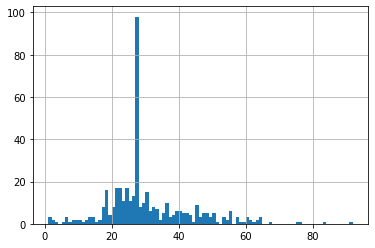

In [ ]:
titanic_df.Age.hist(bins=91) # построим гистограмму распределения возраста пассажиров

In [ ]:
titanic_df['Pclass'].unique() # посмотрим какие значения принимает признак Pclass (класс каюты)

array([3, 2, 1])

In [ ]:
titanic_df['Pclass'].value_counts() # сколько раз встерчается каждый класс обслуживания в нашем датасете

3    217
1    107
2     93
Name: Pclass, dtype: int64

In [ ]:
# создадим новые признаки, кодирующие класс обслуживания в формате OHE

titanic_df['Pclass_01'] = (titanic_df['Pclass'] == 1).astype(int)
titanic_df['Pclass_02'] = (titanic_df['Pclass'] == 2).astype(int)
titanic_df['Pclass_03'] = (titanic_df['Pclass'] == 3).astype(int)

In [ ]:
titanic_df.head() # выведем результат

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_is_Unknown,Cabin_is_Unknown,Has SibSp,Has Parch,Sex01,Pclass_01,Pclass_02,Pclass_03
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,0,0,1,0,0,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,1,0,0,0,0,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,0,0,1,0,1,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0,0,1,0,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,1,1,1,0,0,0,1


In [ ]:
# создадим признаки  is_child (ребенок) is_adult (взрослый) и is_old (пожилой) и заполним их
titanic_df['is_child'] = (titanic_df['Age'] <= 17).astype(int)
titanic_df['is_adult'] = ((titanic_df['Age'] >= 18) & (titanic_df['Age'] < 60) ).astype(int)
titanic_df['is_old'] = (titanic_df['Age'] >= 60).astype(int)

In [ ]:
# напишем функцию для извлечения титула из имени пассажира
def title_from_name(s):
    return str.strip(str.split(str.split(s,",")[1],".")[0] + ".")

# создадим новую колонку, соответствующую титулу пассажира
titanic_df['Title'] = titanic_df['Name'].apply(title_from_name)

In [ ]:
# напишем функцию для объединения похожих титулов в одну группу
def transform_title(title):
    if(title in ['Mr.','Mrs.','Miss.','Master.']):
        return title
    elif (title in  ['Ms.', 'Mme.']):
        return 'Mrs.'
    elif(title=='Mlle.'):
        return 'Miss.'
    elif(title in  ['Sir', 'Don.', 'Jonkheer.', 'Dr.', 'Col.', 'Capt.', 'Major.', 'Rev.']): 
        return 'Mr.'
    elif(title in ['Lady.', 'the Countess.']):
        return 'Mrs.'
    else:
        return 'Mr.'
    
titanic_df['Title'] = titanic_df['Title'].apply(transform_title)

In [ ]:
# посмотрим значения, которые хранятся в колонке "Титул"
titanic_df.Title.value_counts()

Mr.        245
Miss.       78
Mrs.        73
Master.     21
Name: Title, dtype: int64

In [ ]:
# создадим новые колонки, в которых закодируем один из четырех вариантов титула пассажира в формате OHE 
titanic_df['is_Mr'] = titanic_df['Title'].apply(lambda x : int(x == 'Mr.')) 
titanic_df['is_Miss'] = titanic_df['Title'].apply(lambda x : int(x == 'Miss.'))
titanic_df['is_Mrs'] = titanic_df['Title'].apply(lambda x : int(x == 'Mrs.'))
titanic_df['is_Master'] = titanic_df['Title'].apply(lambda x : int(x == 'Master.'))

In [ ]:
titanic_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_is_Unknown,Cabin_is_Unknown,Has SibSp,Has Parch,Sex01,Pclass_01,Pclass_02,Pclass_03,is_child,is_adult,is_old,Title,is_Mr,is_Miss,is_Mrs,is_Master
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,0,0,1,0,0,1,0,1,0,Mr.,1,0,0,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,1,1,0,0,0,0,1,0,1,0,Mrs.,0,0,1,0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,0,0,1,0,1,0,0,0,1,Mr.,1,0,0,0


In [ ]:
titanic_df.columns # выведем список колонок в нашем датасете

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_is_Unknown', 'Cabin_is_Unknown', 'Has SibSp',
       'Has Parch', 'Sex01', 'Pclass_01', 'Pclass_02', 'Pclass_03', 'is_child',
       'is_adult', 'is_old', 'Title', 'is_Mr', 'is_Miss', 'is_Mrs',
       'is_Master'],
      dtype='object')

In [ ]:
# создадим список колонок, из которых будем сохранять данные в нашу выборку

colums_to_x = ['Has SibSp', 'Has Parch', 'Sex01', 'Pclass_01', 'Pclass_02',
       'Pclass_03', 'is_child', 'is_adult', 'is_old', 'is_Mr', 'is_Miss', 'is_Mrs', 'is_Master']

In [ ]:
titanic_df[colums_to_x].head() # посмотрим на данные, на которых мы попробуем обучать нашу модель

,Has SibSp,Has Parch,Sex01,Pclass_01,Pclass_02,Pclass_03,is_child,is_adult,is_old,is_Mr,is_Miss,is_Mrs,is_Master
0,0,0,1,0,0,1,0,1,0,1,0,0,0
1,1,0,0,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,1,0,0,0
3,0,0,1,0,0,1,0,1,0,1,0,0,0
4,1,1,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
# выгрузим данные в nd.array
X = titanic_df[colums_to_x].values
X.shape

(417, 13)

In [ ]:
# также сохраним наши метки (выжил/не выжил) в nd.array
y = titanic_df[['Survived']].values
y.shape

(417, 1)

## Чтение данных в DataFrame и сохранение DataFrame

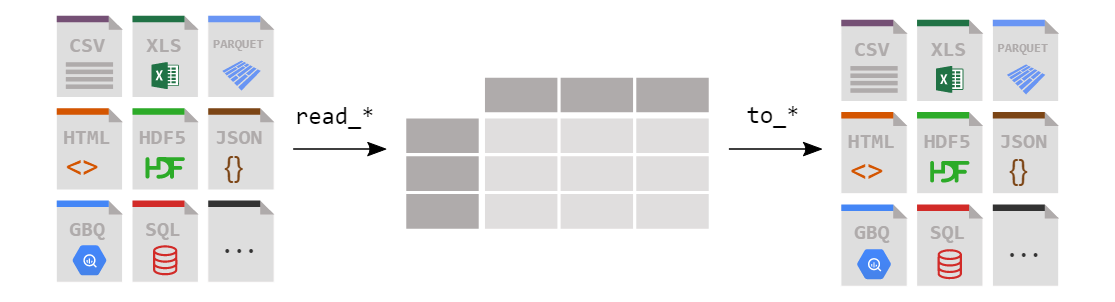

Для чтения данных из форматов csv или таблицы, сохраненной в виде файла XLS можно использовать две основные функции:

*   pd.read_csv
*   pd.read_excel

Аргументы read_csv (только основные)

*  filepath_or_buffer - путь к файлу
*  sep - разделитель, по умолчанию ","
*  header - где брать названия колонок 
*  encoding - используемая кодирвока (для русского языка использовать "cp1250")


С чтением данных мы уже познакомились, посмотрим как сохранять данные

In [ ]:
# создадим DataFrame
tabel_a = pd.DataFrame({'математика' : [5, 2, 3], 
                        'физика' : [5, 4, 2], 
                        'литература' : [4, 5, 4]}, index = index)
tabel_a

,математика,физика,литература
Иванов,5,5,4
Петров,2,4,5
Сидоров,3,2,4


In [ ]:
# сохраним его в csv файл
tabel_a.to_csv('tabel.csv', sep=',', header=True, index=True)

,математика,физика,литература

Иванов,5,5,4

Петров,2,4,5

Сидоров,3,2,4


In [ ]:
# сохраним DataFrame в файл Excel

tabel_a.to_excel('tabel.xls')

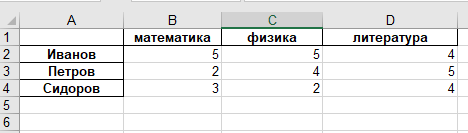

## Знакомство с данными

Для знакомства с данными можно использовать следующие функции и методы:

Для DataFrame:
* df.head(n) - вывести n первых строк DataFrame, по умолчанию n=5 
* df.tail(n) - вывести n последних строк DataFrame, по умолчанию n=5 
* df.shape  - возвращает кортеж, содержащий количество строк и столбцов
* df.info - вывести информацию о DataFrame - колонки, количество значений, тип 
* df.columns - вернет индекс по колонкам
* df.index - вернет индекс по строкам
* df.describe() - вывод описательных статистик для каждого столбца содержащего числовые данные (количество, среднее, минимальное и максимальное, медиана, квантили) 

Для Series:
*   s.unique() - список уникальных значений
*   s.value_counts() - вернет информацию о количестве повторов для каждого уникального значения
*  s.max(), s.min(), s.mean(), s.sum() - вернут соответственно максимальный элемент, минимальный элемент, среднее по всем элементам и сумму всех элементов
* s.describe() - вывод описательных статистик







In [ ]:
# создадим DataFrame

index = ['Иванов', 'Петров', 'Сидоров', 'Кузнецов', 'Попов', 'Васильев', 'Кондратьев', 'Соколов']
df = pd.DataFrame({'математика' : [5, 2, 3, 5, 4, 5, 4, 5],
                    'физика' :    [5, 4, 2, 3, 3, 4, 4, 2], 
                    'литература' :[4, 5, 4, 3, 5, 5, 4, 5],
                   'физкультура' :[5, 3, 2, 3, 4, 5, 5, 3],
                   'информатика' :[5, 5, 4, 5, 5, 5, 2, 5], 
                   },  index = index)
df # посмотрим на него

,математика,физика,литература,физкультура,информатика
Иванов,5,5,4,5,5
Петров,2,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондратьев,4,4,4,5,2
Соколов,5,2,5,3,5


In [ ]:
df.head(3) # выведем три первых значения

,математика,физика,литература,физкультура,информатика
Иванов,5,5,4,5,5
Петров,2,4,5,3,5
Сидоров,3,2,4,2,4


In [ ]:
df.shape # посмотрим на форму данных (количество строк и столбцов)

(8, 5)

In [ ]:
df.info() # выведем инфомрацию о количестве колонок, типе данных, количестве значений

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Иванов to Соколов
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   математика   8 non-null      int64
 1   физика       8 non-null      int64
 2   литература   8 non-null      int64
 3   физкультура  8 non-null      int64
 4   информатика  8 non-null      int64
dtypes: int64(5)
memory usage: 384.0+ bytes


In [ ]:
df.columns # посмотрим на названия колонок

Index(['математика', 'физика', 'литература', 'физкультура', 'информатика'], dtype='object')

In [ ]:
df.index # посмотрим на индексы строк

Index(['Иванов', 'Петров', 'Сидоров', 'Кузнецов', 'Попов', 'Васильев',
       'Кондратьев', 'Соколов'],
      dtype='object')

In [ ]:
df.describe() # выведем описательную статистику методом describe

,математика,физика,литература,физкультура,информатика
count,8.000000,8.00000,8.000000,8.000000,8.000000
mean,4.125000,3.37500,4.375000,3.750000,4.500000
std,1.125992,1.06066,0.744024,1.164965,1.069045
min,2.000000,2.00000,3.000000,2.000000,2.000000
25%,3.750000,2.75000,4.000000,3.000000,4.750000
50%,4.500000,3.50000,4.500000,3.500000,5.000000
75%,5.000000,4.00000,5.000000,5.000000,5.000000
max,5.000000,5.00000,5.000000,5.000000,5.000000


In [ ]:
df.T.describe() # выведем описательную статистику по транспонированному DataFrame

,Иванов,Петров,Сидоров,Кузнецов,Попов,Васильев,Кондратьев,Соколов
count,5.000000,5.00000,5.0,5.000000,5.00000,5.000000,5.000000,5.000000
mean,4.800000,3.80000,3.0,3.800000,4.20000,4.800000,3.800000,4.000000
std,0.447214,1.30384,1.0,1.095445,0.83666,0.447214,1.095445,1.414214
min,4.000000,2.00000,2.0,3.000000,3.00000,4.000000,2.000000,2.000000
25%,5.000000,3.00000,2.0,3.000000,4.00000,5.000000,4.000000,3.000000
50%,5.000000,4.00000,3.0,3.000000,4.00000,5.000000,4.000000,5.000000
75%,5.000000,5.00000,4.0,5.000000,5.00000,5.000000,4.000000,5.000000
max,5.000000,5.00000,4.0,5.000000,5.00000,5.000000,5.000000,5.000000


In [ ]:
s = df['математика'] # создадим объект Series как колонку нашего DataFrame
s

Иванов        5
Петров        2
Сидоров       3
Кузнецов      5
Попов         4
Васильев      5
Кондратьев    4
Соколов       5
Name: математика, dtype: int64

In [ ]:
s.unique() # посмотрим на то, какие уникальные оценки у нас есть

array([5, 2, 3, 4])

In [ ]:
s.value_counts() # и посчитаем какие оценки сколько раз встречаются

5    4
4    2
3    1
2    1
Name: математика, dtype: int64

In [ ]:
s.describe() # посмотрим на описательные статистики

count    8.000000
mean     4.125000
std      1.125992
min      2.000000
25%      3.750000
50%      4.500000
75%      5.000000
max      5.000000
Name: математика, dtype: float64

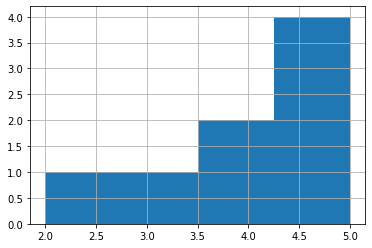

In [ ]:
s.hist(bins=4)# визуализируем (построим гистограмму)

## Работа с пропусками

Работа с пропусками - это творческая задача. Какой конкретный инструмент применять в том или ином случае решает исследователь, наша цель - познакомиться  основными доступными инструментами.

Для обработки пропусков возможны две основные стратегии - заполнение пропусков или удаление строк/колонок содержащих пропуски. Основные функции:


*   df.fillna(value) -заполняет пропущенный значения значением value
*   df.dropna(axis) 
    *   axis=0 -удаление строк
    *   axis=1 -удаление столбцов






In [ ]:
import numpy as np # импортируем numpy, он нам понадобится дальше

In [ ]:
# создадим DataFrame, но на этот раз добавим в него пропуски
index = ['Иванов', 'Петров', 'Сидоров', 'Кузнецов', 'Попов', 'Васильев', 'Кондратьев', 'Соколов']

df = pd.DataFrame({'математика' : [np.nan, 2, 3, 5, 4, 5, 4, 5],
                    'физика' :    [5, 4, 2, 3, 3, 4, 4, 2], 
                    'литература' :[4, 5, 4, 3, 5, 5, 4, 5],
                   'физкультура' :[np.nan, 3, 2, 3, 4, 5, 5, 3],
                   'информатика' :[5, 5, 4, 5, 5, 5, 2, 5],
                   'труды'       :[np.nan, np.nan, np.nan, np.nan, 5, 3, np.nan, np.nan] 
                   }, 
                        index = index)
df # посмотрим на результат

,математика,физика,литература,физкультура,информатика,труды
Иванов,NaN,5,4,NaN,5,NaN
Петров,2.0,4,5,3.0,5,NaN
Сидоров,3.0,2,4,2.0,4,NaN
Кузнецов,5.0,3,3,3.0,5,NaN
Попов,4.0,3,5,4.0,5,5.0
Васильев,5.0,4,5,5.0,5,3.0
Кондратьев,4.0,4,4,5.0,2,NaN
Соколов,5.0,2,5,3.0,5,NaN


In [ ]:
df.fillna(2) # посмотрим что будет если заполнить все пропуски оценкой 2

,математика,физика,литература,физкультура,информатика,труды
Иванов,2.0,5,4,2.0,5,2.0
Петров,2.0,4,5,3.0,5,2.0
Сидоров,3.0,2,4,2.0,4,2.0
Кузнецов,5.0,3,3,3.0,5,2.0
Попов,4.0,3,5,4.0,5,5.0
Васильев,5.0,4,5,5.0,5,3.0
Кондратьев,4.0,4,4,5.0,2,2.0
Соколов,5.0,2,5,3.0,5,2.0


In [ ]:
df.dropna(axis=0) # посмотрим что будет если удалить все строки, в которых есть пропуски

,математика,физика,литература,физкультура,информатика,труды
Попов,4.0,3,5,4.0,5,5.0
Васильев,5.0,4,5,5.0,5,3.0


In [ ]:
df.dropna(axis=1) # посмотрим что будет если удалить все столбцы, в которых есть пропуски

,физика,литература,информатика
Иванов,5,4,5
Петров,4,5,5
Сидоров,2,4,4
Кузнецов,3,3,5
Попов,3,5,5
Васильев,4,5,5
Кондратьев,4,4,2
Соколов,2,5,5


несколько слов о том, как производятся преобразования с таблицей

Eсли мы просто применяем метод, изменяющий наш DataFrame, то  получаем **копию** исходной таблицы с произведенными изменениями. **Исходная таблица не меняется**. 

Если мы хотим изменить исходную таблицу нужно вызвать метод, изменяющий таблицу с параметром **inplace=True**

In [ ]:
df.fillna(0, inplace=True) # заполним пропуски значением 0, и применим это к нашей таблице
df # посмотрим на результат

,математика,физика,литература,физкультура,информатика,труды
Иванов,0.0,5,4,0.0,5,0.0
Петров,2.0,4,5,3.0,5,0.0
Сидоров,3.0,2,4,2.0,4,0.0
Кузнецов,5.0,3,3,3.0,5,0.0
Попов,4.0,3,5,4.0,5,5.0
Васильев,5.0,4,5,5.0,5,3.0
Кондратьев,4.0,4,4,5.0,2,0.0
Соколов,5.0,2,5,3.0,5,0.0


## Извлечение подмножеств из DataFrame

### Извлечение нескольких колонок

Выбрать несколько колонок можно следующим способом:

```
df[список колонок] # результатом будет pd.DataFrame
```


Обратиться к одной колонке мы можем двумя способами

```
df[имя колонки] # результатом будет pd.Series
```

```
df[[имя колонки]] # результатом будет pd.DataFrame

```





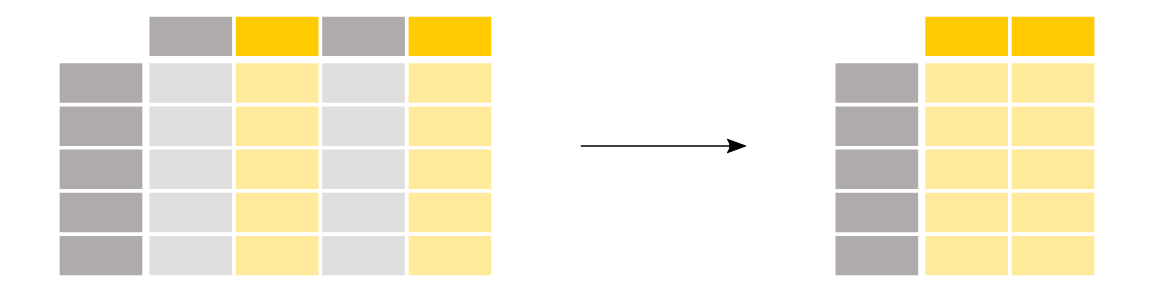

In [ ]:
# снова создадим DataFrame
index = ['Иванов', 'Петров', 'Сидоров', 'Кузнецов', 'Попов', 'Васильев', 'Кондарьев', 'Соколов']

df = pd.DataFrame({'математика' : [5, 2, 3, 5, 4, 5, 4, 5],
                    'физика' :    [5, 4, 2, 3, 3, 4, 4, 2], 
                    'литература' :[4, 5, 4, 3, 5, 5, 4, 5],
                   'физкультура' :[5, 3, 2, 3, 4, 5, 5, 3],
                   'информатика' :[5, 5, 4, 5, 5, 5, 2, 5], 
                   }, 
                        index = index)
df

,математика,физика,литература,физкультура,информатика
Иванов,5,5,4,5,5
Петров,2,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондарьев,4,4,4,5,2
Соколов,5,2,5,3,5


In [ ]:
df1 = df[['математика', 'физика']] # извлечем две колонки из исходного
df1 

,математика,физика
Иванов,5,5
Петров,2,4
Сидоров,3,2
Кузнецов,5,3
Попов,4,3
Васильев,5,4
Кондарьев,4,4
Соколов,5,2


In [ ]:
df2 = df[['математика']] # извлечем одну колонку
df2

,математика
Иванов,5
Петров,2
Сидоров,3
Кузнецов,5
Попов,4
Васильев,5
Кондарьев,4
Соколов,5


In [ ]:
df['математика'] # а так создается Series (обратите внимание на количество квадратных скобок)

Иванов       5
Петров       2
Сидоров      3
Кузнецов     5
Попов        4
Васильев     5
Кондарьев    4
Соколов      5
Name: математика, dtype: int64

### Извлечение нескольких строк по маске (фильтрация)

DataFrame поддерживает фильтрацию с помощью маски. 


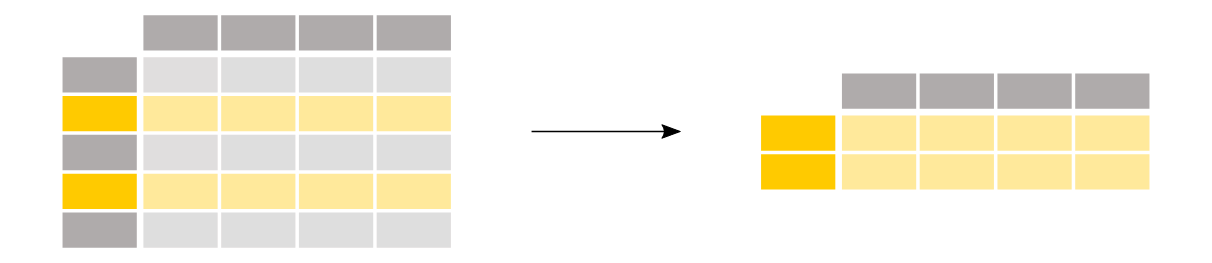

In [ ]:
# создание маски с условием "оценка по математике больше или равна 4"
mask = df['математика'] >= 4
mask 

Иванов        True
Петров       False
Сидоров      False
Кузнецов      True
Попов         True
Васильев      True
Кондарьев     True
Соколов       True
Name: математика, dtype: bool

In [ ]:
df[mask] # применим маску к нашему DataFrame и выведем всех "хорошистов" по математике

,математика,физика,литература,физкультура,информатика
Иванов,5,5,4,5,5
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондарьев,4,4,4,5,2
Соколов,5,2,5,3,5


### Выбор конкретных значений из нашей таблицы

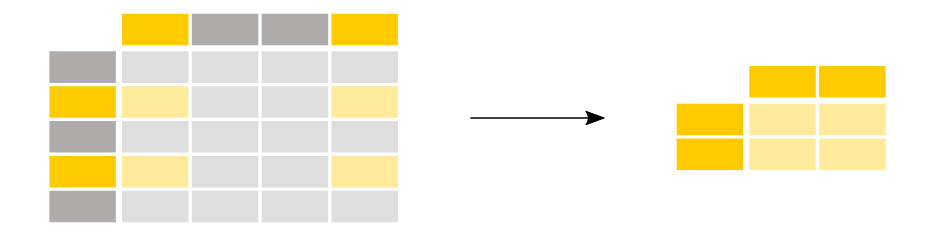

для выбора конкретных значений мы используем методы loc и iloc c квадратными скобками  [  ]

Внутри квадратных скобок можно использовать 
* просто название колонки, ряда
* список из колонок и рядов
* срез
* логическое выражене
* двоеточие

Выбираем loc если используем поиск по наименованиям строк/столбцов
Выбираем iloc если используем поиск по номеру строки/столбца

В подвыборкам можно присвоить новые значения и это изменит основную таблицу с данными


In [ ]:
students = ['Кузнецов', 'Петров'] # список студентов, по которым мы хотим посмотреть
students_idx = [1, 4] # порядковый номер студентов в индексе
ciricula = ['математика', 'физика'] # список предметов, по которым мы хотим получить информацию
ciricula_idx = [0, 1] # порядковый номер предметов в индексах колонок

In [ ]:
df.loc[students, ciricula] # получим выборку студенты/предметы с применением loc

,математика,физика
Кузнецов,5,3
Петров,2,4


In [ ]:
df.iloc[students_idx, ciricula_idx] # получим выборку студенты/предметы с применением iloc

,математика,физика
Петров,2,4
Попов,4,3


In [ ]:
df.iloc[:5, 0::2] # еще один вариант применения iloc, на этот раз используем срезы

,математика,литература,информатика
Иванов,5,4,5
Петров,2,5,5
Сидоров,3,4,4
Кузнецов,5,3,5
Попов,4,5,5


In [ ]:
df.loc['Петров', 'математика'] # посмотрим, какая оценка у Петрова по математике

2

In [ ]:
df.loc['Петров', 'математика'] = 4 # исправим двойку на четверку

In [ ]:
df # проверим результат

,математика,физика,литература,физкультура,информатика
Иванов,5,5,4,5,5
Петров,4,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5
Васильев,5,4,5,5,5
Кондарьев,4,4,4,5,2
Соколов,5,2,5,3,5


## Добавление новых данных

### Добавление новых колонок

In [ ]:
df.head() # вспомним, как выглядел наш DataFrame

,математика,физика,литература,физкультура,информатика
Иванов,5,5,4,5,5
Петров,4,4,5,3,5
Сидоров,3,2,4,2,4
Кузнецов,5,3,3,3,5
Попов,4,3,5,4,5


In [ ]:
df['биология'] = [5, 5, 5, 5, 5, 5, 5, 5] # добавим новую колонку Биология
df.head() # выведем 5 первых строк

,математика,физика,литература,физкультура,информатика,биология
Иванов,5,5,4,5,5,5
Петров,4,4,5,3,5,5
Сидоров,3,2,4,2,4,5
Кузнецов,5,3,3,3,5,5
Попов,4,3,5,4,5,5


### Добавление новых колонок на основе существуюущих

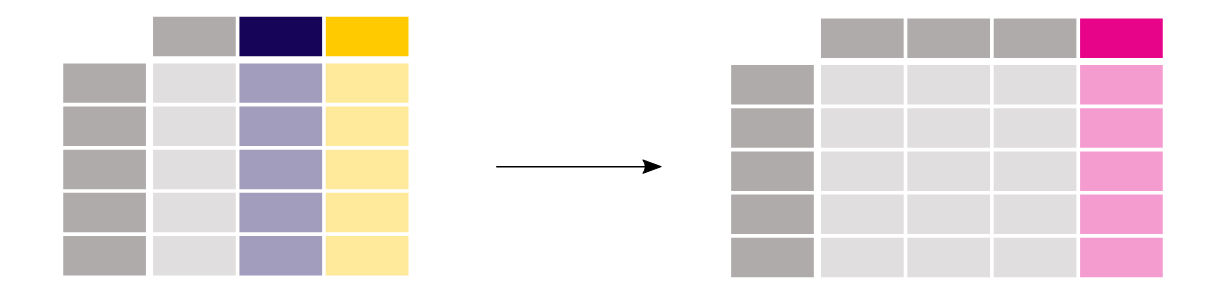

Новую колонку можно создать используя следующую конструкцию

df['new_column'] = выражение, возвращающее объект Series

In [ ]:
# создадим новую колонку "точные науки" как сумму колонок "математика", "физика" и "информатика"
df['точные науки'] = df['математика'] +  df['физика'] + df['информатика']
df.head()

,математика,физика,литература,физкультура,информатика,биология,точные науки
Иванов,5,5,4,5,5,5,15
Петров,4,4,5,3,5,5,13
Сидоров,3,2,4,2,4,5,9
Кузнецов,5,3,3,3,5,5,13
Попов,4,3,5,4,5,5,12


Важно - операции выполняются поэлементно и имеют красивую понятную запись. Это быстрее чем циклы!

In [ ]:
# создадим колонку "общий ректинг" как сумму по всем оценкам
df['общий рейтинг'] = df.sum(axis=1)

df.head()

,математика,физика,литература,физкультура,информатика,биология,точные науки,общий рейтинг
Иванов,5,5,4,5,5,5,15,44
Петров,4,4,5,3,5,5,13,39
Сидоров,3,2,4,2,4,5,9,29
Кузнецов,5,3,3,3,5,5,13,37
Попов,4,3,5,4,5,5,12,38


In [ ]:
# напишем функцию, преобразующую оценку из целочисленного 2-5 в текстовый "отлично", "хорошо" и т.д.
def int_to_str(i):

    marks = {5 : 'отлично', 
            4: 'хорошо', 
            3: 'удовлетвор.',
            2 : 'неуд.'}    
    return marks[i]

# создадим колонку "информатика для диплома" как результат применения нашей функции к колонке "информатика"
df['информатика_для диплома'] = df['информатика'].apply(int_to_str)
df

,математика,физика,литература,физкультура,информатика,биология,точные науки,общий рейтинг,информатика_для диплома
Иванов,5,5,4,5,5,5,15,44,отлично
Петров,4,4,5,3,5,5,13,39,отлично
Сидоров,3,2,4,2,4,5,9,29,хорошо
Кузнецов,5,3,3,3,5,5,13,37,отлично
Попов,4,3,5,4,5,5,12,38,отлично
Васильев,5,4,5,5,5,5,14,43,отлично
Кондарьев,4,4,4,5,2,5,10,34,неуд.
Соколов,5,2,5,3,5,5,12,37,отлично


### Добавление новых строк

In [ ]:
# создадим DataFrame
df = pd.DataFrame({'студент' : ['Иванов', 'Петров', 'Сидоров', 'Кузнецов', 'Попов', 'Васильев', 'Кондарьев', 'Соколов'], 
                    'математика' : [5, 2, 3, 5, 4, 5, 4, 5],
                    'физика' :    [5, 4, 2, 3, 3, 4, 4, 2], 
                    'литература' :[4, 5, 4, 3, 5, 5, 4, 5],
                   'физкультура' :[5, 3, 2, 3, 4, 5, 5, 3],
                   'информатика' :[5, 5, 4, 5, 5, 5, 2, 5], 
                   }, )
df

,студент,математика,физика,литература,физкультура,информатика
0,Иванов,5,5,4,5,5
1,Петров,2,4,5,3,5
2,Сидоров,3,2,4,2,4
3,Кузнецов,5,3,3,3,5
4,Попов,4,3,5,4,5
5,Васильев,5,4,5,5,5
6,Кондарьев,4,4,4,5,2
7,Соколов,5,2,5,3,5


In [ ]:
# создадим словарь, на основании которого будет сделана новая запись
new_student = {'информатика': 3,
                'литература': 5,
                'математика': 2,
                'студент': 'Васечкин',
                'физика': 4,
                'физкультура': 4}

df = df.append(new_student, ignore_index=True) # добавим новую запись в наш DataFrame

## Обработка текстовых значений

Очень часто нам нужно обрататывать текстовые значения для извлечения из них каких-то важных признаков (мы видели это на примере датасета Титаник). Остановимся на том, как работать с текстовыми данными подробнее

В работе со строковыми значениями нам приходит на помощь модуль Series.str
Доступные функции (самые необходимые):
*    Series.str.lower -перевод всех строк в нижний регистр
*    Series.str.upper - перевод всех строк в верхний регистр
*    Series.str.title - первая буква каждого слова переводится в верхний регистр, остальные буквы в нижний регистр
*    Series.str.split - разделяет строку на набор слов по указаному разделителю

подробнее можно с Series.str можно ознакомиться в [документации](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling) 



In [ ]:
titanic_df['Name'] # посмотрим на исходную колонку содержащую имя

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 417, dtype: object

In [ ]:
titanic_df['Name'].str.lower() # преобразуем имя к нижнему регистру

0                                  kelly, mr. james
1                  wilkes, mrs. james (ellen needs)
2                         myles, mr. thomas francis
3                                  wirz, mr. albert
4      hirvonen, mrs. alexander (helga e lindqvist)
                           ...                     
413                              spector, mr. woolf
414                    oliva y ocana, dona. fermina
415                    saether, mr. simon sivertsen
416                             ware, mr. frederick
417                        peter, master. michael j
Name: Name, Length: 417, dtype: object

In [ ]:
titanic_df['Name'].str.split(',') # разобъем строку используя в качестве разделялетя знак ","

0                                  [Kelly,  Mr. James]
1                  [Wilkes,  Mrs. James (Ellen Needs)]
2                         [Myles,  Mr. Thomas Francis]
3                                  [Wirz,  Mr. Albert]
4      [Hirvonen,  Mrs. Alexander (Helga E Lindqvist)]
                            ...                       
413                              [Spector,  Mr. Woolf]
414                    [Oliva y Ocana,  Dona. Fermina]
415                    [Saether,  Mr. Simon Sivertsen]
416                             [Ware,  Mr. Frederick]
417                        [Peter,  Master. Michael J]
Name: Name, Length: 417, dtype: object

In [ ]:
titanic_df['Surname'] = titanic_df['Name'].str.split(',').str.get(0) # разобъем строку используя в качестве разделялетя знак "," и возьмем первый элемент получившегося списка
titanic_df['Surname']

0              Kelly
1             Wilkes
2              Myles
3               Wirz
4           Hirvonen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: Surname, Length: 417, dtype: object

In [ ]:
# напишем сложную функцию обработки для извлечения Title из Name
# не пугайтесь если не понятно, в следующих ячейках мы подробно рассмотрим каждый шаг
titanic_df['Title'] = titanic_df['Name'].str.split(',').str.get(1).str.split('.').str.get(0) + '.'

In [ ]:
titanic_df['Name'].str.split(',') # разобъем строку используя в качестве разделителя знак ","

0                                  [Kelly,  Mr. James]
1                  [Wilkes,  Mrs. James (Ellen Needs)]
2                         [Myles,  Mr. Thomas Francis]
3                                  [Wirz,  Mr. Albert]
4      [Hirvonen,  Mrs. Alexander (Helga E Lindqvist)]
                            ...                       
413                              [Spector,  Mr. Woolf]
414                    [Oliva y Ocana,  Dona. Fermina]
415                    [Saether,  Mr. Simon Sivertsen]
416                             [Ware,  Mr. Frederick]
417                        [Peter,  Master. Michael J]
Name: Name, Length: 417, dtype: object

In [ ]:
titanic_df['Name'].str.split(',').str.get(1) # разобъем строку используя в качестве разделялетя знак "," и возьмем второй элемент списка

0                                Mr. James
1                 Mrs. James (Ellen Needs)
2                       Mr. Thomas Francis
3                               Mr. Albert
4       Mrs. Alexander (Helga E Lindqvist)
                      ...                 
413                              Mr. Woolf
414                          Dona. Fermina
415                    Mr. Simon Sivertsen
416                          Mr. Frederick
417                      Master. Michael J
Name: Name, Length: 417, dtype: object

In [ ]:
titanic_df['Name'].str.split(',').str.get(1).str.split('.') # разобъем полученную в предыдущих итерациях строку используя в качестве разделителя "."

0                               [ Mr,  James]
1                [ Mrs,  James (Ellen Needs)]
2                      [ Mr,  Thomas Francis]
3                              [ Mr,  Albert]
4      [ Mrs,  Alexander (Helga E Lindqvist)]
                        ...                  
413                             [ Mr,  Woolf]
414                         [ Dona,  Fermina]
415                   [ Mr,  Simon Sivertsen]
416                         [ Mr,  Frederick]
417                     [ Master,  Michael J]
Name: Name, Length: 417, dtype: object

In [ ]:
titanic_df['Name'].str.split(',').str.get(1).str.split('.').str.get(0) # из каждого списка возьмем первый элемент

0           Mr
1          Mrs
2           Mr
3           Mr
4          Mrs
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: Name, Length: 417, dtype: object

In [ ]:
titanic_df['Name'].str.split(',').str.get(1).str.split('.').str.get(0) + '.' # добавим точку в конце титула

0           Mr.
1          Mrs.
2           Mr.
3           Mr.
4          Mrs.
         ...   
413         Mr.
414       Dona.
415         Mr.
416         Mr.
417     Master.
Name: Name, Length: 417, dtype: object

## Литература

1. Несколько интересных статей про Pandas на русском языке [на сайте Devpractice](https://devpractice.ru/category/machine-learning-and-data-analysis/pandas/)

2. Небольшой онлайн-курс по Pandas [от Kaggle](https://www.kaggle.com/learn/pandas)

3. Туториалы для начинающих [на официальном сайте Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)

4. Шпаргалка по Pandas [на Habr](https://habr.com/ru/company/ruvds/blog/494720/)

5. Еще одна шпаргалка по Pandas [с официального сайта ](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

# The End